# Descriptive statistics - Unit 03: Variability

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Understand the concepts around descriptive statistics


---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Variability

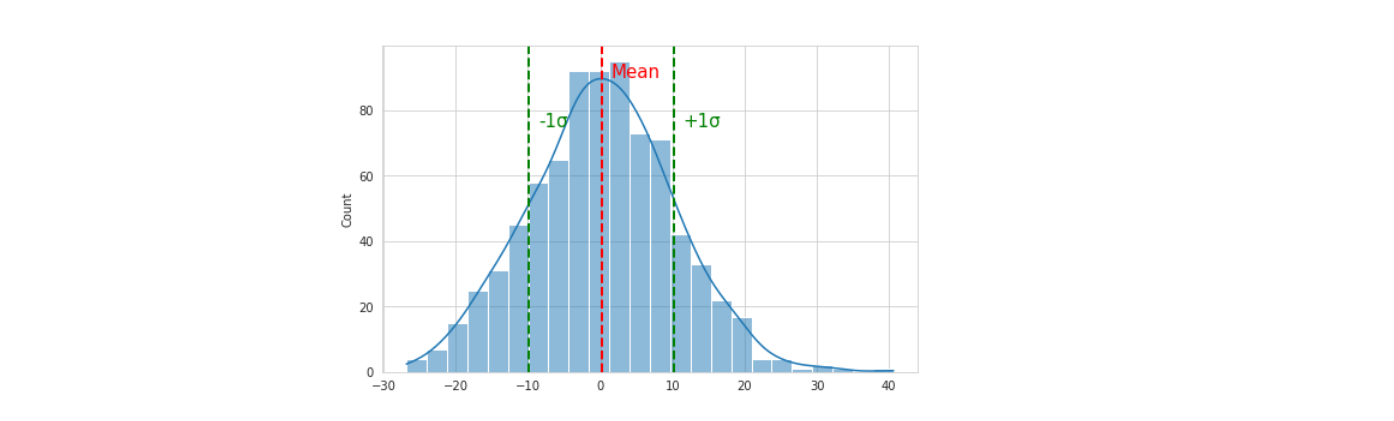

Let's load the DataFrame df we used in the previous unit

from scipy.stats import skewnorm
np.random.seed(seed=1)
size=800

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

We are adding more columns to our DataFrame. They are normal distributions with different standard deviation: 1, 5 and 10. They were generated with `np.random.normal()` and its documentation is [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).
* These new variables will help to illustrate better the concepts covered in this unit

df['NormalStd_1']= np.random.normal(loc=0, scale=1, size=size)
df['NormalStd_5']= np.random.normal(loc=0, scale=5, size=size)
df['NormalStd_10']= np.random.normal(loc=0, scale=10, size=size)

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Measures of Variability. 
  * We are interested to complement the previous analysis with more information **by quantifying how the data is spread** by calculating:
    * Variance
    * Standard Deviation
    * Skewness
    * Kurtosis
    * Percentiles and Quartiles
    * Range


---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Variance

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Variance shows the spread of the data around the mean, it is a number that **tells how far/close the data points are from the mean**
  * To calculate variance from your numerical data in your DataFrame or Series, use the method **.var()**

df.var()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Standard Deviation

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Standard deviation is also related to data spread. It is also known as sigma and  the symbol **σ**.
  * It measures the **dispersion of the data from the mean** in either direction

* You can calculate the standard deviation from your DataFrame or Series either by applying the square root (using `np.sqrt()` for example) of variance or using the method `.std()`.  The documentation link is[here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)

np.sqrt(df.var())

The most common approach is with `.std()`.


df.std()

You can better understand the standard deviation by plotting its value in relation to the mean.
  * In other words, consider your mean, add and subtract/add one standard deviation
  * In the cell below, we consider the normal distribution colum and plot the mean and one standard deviation in relation to the mean, using the knowledge from Matplotlib and Seaborn

col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

plt.axvline(df[col].mean() + df[col].std(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='k')

plt.axvline(df[col].mean() - df[col].std(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=-df[col].mean() - df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.65, s='-1σ', fontsize=15, c='k')

plt.show()

Let's loop over all columns now
* Pay attention to which extend the data deviates or change around the mean

for col in df.columns:

  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].mean() + df[col].std(), color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='g')

  plt.axvline(df[col].mean() - df[col].std(), color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() - df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='-1σ', fontsize=15, c='g')

plt.show()


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> There is an empirical rule for a normal distribution that 99.7% (or almost all of the observed data) is within **3 standard deviations** of the mean. 
* Also, 68% of the data falls within one standard deviation, and 95% percent within two standard deviations. Let's check that.
* Here we plot the mean, and 3 standard deviations from the mean, so we can check if almost all data falls into the interval of 3 standard deviation in a normal distribution

col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

for num in[1,2,3]:
  plt.axvline(df[col].mean() + num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].mean() + num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'+{num}σ', fontsize=9, c='g')

  plt.axvline(df[col].mean() - num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].mean() - num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'-{num}σ', fontsize=9, c='g')


plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Let's check if this behaviour happens with other types of distribution
* Note that there are variables where the distribution are inside the positive and negative range of 3 standard deviation; some of them even don't reach 2 standard deviation of spread.
  * A normal distribution is one where there is symmetrical distribution around the mean. The values less than one standard deviation away from the mean account for 68.27% of the total while two standard deviations from the mean account for 95.45% and three standard deviations account for 99.73%.
  * This fact makes standard deviation a useful diagnostic. If 1 in every 100 measurements is outside 3 sigma there is no problem. If 2 or more are outside 3 sigma then you have an issue. Something has changed in the distribution.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> At the same time, there are variables, like log normal, where its values go much longer than 3 standard deviation of spread

for col in df.columns:

  fig, axes = plt.subplots(figsize=(10,6))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"{col} Distribution")
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  for num in[1,2,3]:
    plt.axvline(df[col].mean() + num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].mean() + num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'+{num}σ', fontsize=9, c='g')

    plt.axvline(df[col].mean() - num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].mean() - num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'-{num}σ', fontsize=9, c='g')


  plt.show()
  print("\n")

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> **Quick QUIZ**
* If you were a machine, **which type of distriubtion would you ideally would like to work on?** What is more friendly so far?
  * We hope you would say the **normal distribution**, since we can explain easily all points using mean and standard deviation
  * **Other distributions** can be also be explained, however normal distribution is easier.

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Skewness

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Skewness is the asymmetry of the data. 
  * A distribution is symmetric when it looks the same to the left and right of the center point. It is horizontally mirrored.
    * The closer to zero, the less skewed the data is and the more symetrical the data is.
    * Positive Skewness happens when the tail on the right side is longer. 
    * Negative Skewness happens when the tail of the left side of the distribution is longer.

* If for example, your values are all positive but are close to zero then your distribution will be skewed as you cannot have negative values. This is considered a distribution bound by 0. This equally applies to any hard boundary for your value

* To calculate skewness in your DataFrame or Series, use `.skew()`. The documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html)

df.skew()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Can you correlate the skew levels and the distribution shape?
  * You will notice that skewness levels, either positive or negative, above 2 creates a significant asymetry in your data. Check Exponential column

for col in df.columns:
  fig, axes = plt.subplots(figsize=(10,5))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"{col} Distribution")
  plt.text(x=df[col].min(), y=axes.get_ylim()[1] * 0.95, s=f"Skewness: {df[col].skew().round(2)}", fontsize=15, c='r')
  plt.show()
  print("\n")

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Kurtosis

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Kurtosis relates to study the **tails of the distribution**. 
  * It is measure of outliers in the distribution. 
  * A distribution with high kurtosis tend to have significant tails, or a big amount of outliers. 
  * On the other hand, a distribution with low kurtosis tends to have a light tail, or few outliers

* An outlier is a value that is not statistically part of the distribution. An outlier can be something that is very unlikely but also might indicate a mismeasure or other error.





To calculate kurtosis in your DataFrame or Series, use `.kurtosis()`. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurtosis.html)

df.kurtosis()

Compare the shape and kurtosis levels for your variables dataset. Can you correlate the kurtosis levels and the distribution shape?

for col in df.columns:
  fig, axes = plt.subplots(figsize=(10,5))
  sns.histplot(data=df, x=col, kde=True)
  plt.text(x=df[col].min(), y=axes.get_ylim()[1] * 0.95, s=f"Kurtosis: {df[col].kurtosis().round(2)}", fontsize=15, c='r')
  plt.show()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Percentiles and Quartiles

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A Percentile is **all values below the given percentage**. 
* Let's give the examples so you can better understand:
    * For example, the 50th percentile is all values below which 50% of the observations may be found. For example, if I tell you that your age is at 50% percentile of your family, that means 50% of your family are younger than you
    * In Data Science, we tend to work with **quartile**, which are the percentiles divided, into four parts. Therefore we have:
      * First quartile (Q1 or 25th percentile)
      * Second quartile (Q2 or 50th percentile or median) and 
      * Third quartile (Q3 or 75th percentile)
    * The interquartile range (IQR) is the difference between the first and third quartile. 
      * This is useful to understand the range where the 50% most frequent of the data is.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> To calculate quartiles in your DataFrame or Series, use `.quantile()`. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)
  * The argument is `q`, and accepts values between 0 and 1, which are the quantile to compute
  * In the example below, we parse a list with
    * 0: 0 percentile, in other other words, the min value
    * 0.25: 1st quartile, or the value that 25% of data is below
    * 0.50: 2nd quartile, or the value that 50% of data is below. Also known as median.
    * 0.75: 3rd quartile, or the value that 75% of data is below
    * 1.00: 100 percentile, or the max value

df.quantile(q=[0,0.25,0.50,0.75,1])

---

Let's check that in practical terms in a graph. Please note the following figures we saw in the previous table for a normal distribution
  * **median**
  * **range**: area delimited by Min and Max
  * **IQR**: area delimited by 1Q and 3Q - This is useful to understand the area where the 50% most frequent of the data is.

col = 'Normal'
map = pd.Series(data=["Min","Q1","Median","Q3","Max"], index=[0,0.25,0.50,0.75,1])

fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x=col, kde=True)
for quantile in [0, 0.25, 0.5, 0.75, 1]:
  plt.axvline(df[col].quantile(q=quantile), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=quantile) + df[col].std()/10,
           y=axes.get_ylim()[1] * 0.95,
           s=f"{map[quantile]}", fontsize=10, c='g')

plt.show()

Let's scan over the variables, pay attention to the same figures (min, max, Q1, Q3, IQR, and Median)

map = pd.Series(data=["Min","Q1","Median","Q3","Max"], index=[0,0.25,0.50,0.75,1])

for col in df.columns:
  fig, axes = plt.subplots(figsize=(10,5))
  sns.histplot(data=df, x=col, kde=True)
  for quantile in [0, 0.25, 0.5, 0.75, 1]:
    plt.axvline(df[col].quantile(q=quantile), color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].quantile(q=quantile) + df[col].std()/10, y=axes.get_ylim()[1] * 0.95, s=f"{map[quantile]}", fontsize=10, c='g')
    

  plt.show()

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> QQ Plot

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We are interested to assess how close our data is to a normal distribution. For that, we use a QQ Plot (Quantile-Quantile plot)
  * When the quantiles of two variables are plotted against each other, then the plot obtained is known as a QQ plot. 
  * This plot provides a summary of **whether the distributions of two variables are similar or not with respect to the locations.**


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> If we **compare** our **data** to a **normal distribution**, we are assessing if our data is normally distributed then
* If your data has the profile of a normal distribution, it should roughly fall in a straight line

  * Since this is a visual tool for comparison, results can also be quite subjective nonetheless useful in the understanding underlying distribution of a variable(s).
  * It is particularly useful in identifying a subtle bimodal or multimodal distribution that would not be visible from a gaussian plot. "

import numpy as np
import pingouin as pg
for col in df.columns:
  fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
  sns.histplot(data=df, x=col, kde=True,ax=axes[0])
  axes[0].set_title("Histogram")
  pg.qqplot(df[col], dist='norm',ax=axes[1])
  fig.suptitle(f"{col} Distribution")
  plt.show()
  print("\n")


---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Range

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Range is  the difference between the **maximum and minimum** values of your distribution


You can calculate the minimum values of your numerical data with `.min()`. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html)

df.min()

You can calculate the max values of your numerical data with `.max()`. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html)

df.max()

The range of the data is the difference between max and min

df.max() - df.min()

Let's plot the data and check its range

for col in df.columns:
    
  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].min(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].min() + df[col].std()/6 , y=axes.get_ylim()[1] * 0.90, s='Min', fontsize=15, c='r')

  plt.axvline(df[col].max(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].max() + df[col].std()/6 , y=axes.get_ylim()[1] * 0.9, s='Max', fontsize=15, c='r')

  plt.show()
  print("\n")

---